# Homework 2

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys
from sklearn.linear_model import LinearRegression
import warnings
from scipy.optimize import fsolve

notebook_dir = "homework"
if notebook_dir in os.getcwd():
    os.chdir("..")
print(os.getcwd())

import cmds.treasury_cmds as tc


c:\Users\Andik\OneDrive\Desktop\Chicago\fixed_income\finm-fixedincome-2025


***

# 1 HBS Case: Fixed-Income Arbitrage in a Financial Crisis (A): US Treasuries in November 2008

## Data
* Use the data file `treasury_ts_2015-08-15.xlsx`.
* Examine the treasure issues with `kytreasno` of `204046` and `204047`. These are the bond and note (respectively) which mature on 2015-08-15.
* Look at the data on 2008-11-04.

## 1.1 The situation

Make a chart comparing the issues in the following features, (as of Nov 4, 2008.)
* coupon rate
* bid
* ask
* accrued interest
* dirty price
* duration (quoted in years, not days, assuming 365.25 days per year.)
* modified duration
* YTM



In [2]:
treasury_data = pd.read_excel("data/treasury_ts_2015-08-15.xlsx",
                              parse_dates=True,
                              sheet_name="database")
treasury_data.head()

,kytreasno,kycrspid,caldt,tdbid,tdask,tdnomprc,tdnomprc_flg,tdsourcr,tdaccint,tdretnua,tdyld,tdduratn,tdpubout,tdtotout,tdpdint,tdidxratio,tdidxratio_flg
0,204046,2.015082e+07,1989-05-02,116.06250,116.31250,116.18750,M,R,2.230663,0.005823,0.000241,3662.963463,6470.0,7150.0,0.0,NaN,NaN
1,204046,2.015082e+07,1989-05-03,116.18750,116.43750,116.31250,M,R,2.260014,0.001303,0.000241,3664.503530,6470.0,7150.0,0.0,NaN,NaN
2,204046,2.015082e+07,1989-05-04,115.59375,115.84375,115.71875,M,R,2.289365,-0.004760,0.000242,3651.504100,6470.0,7150.0,0.0,NaN,NaN
3,204046,2.015082e+07,1989-05-05,116.21875,116.46875,116.34375,M,R,2.318715,0.005545,0.000241,3663.165673,6470.0,7150.0,0.0,NaN,NaN
4,204046,2.015082e+07,1989-05-08,115.71875,115.96875,115.84375,M,R,2.406768,-0.003472,0.000242,3650.099891,6470.0,7150.0,0.0,NaN,NaN


In [3]:
treasury_data_info = pd.read_excel("data/treasury_ts_2015-08-15.xlsx",
                                   parse_dates=True,
                                      sheet_name="info",
                                      header=1,
                                      index_col=0)
treasury_data_info

C:\Users\Andik\AppData\Local\Temp\ipykernel_23884\763893732.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  treasury_data_info = pd.read_excel("data/treasury_ts_2015-08-15.xlsx",


,204046,204047,206524
kytreasno,,,
kycrspid,20150815.110620,20150815.204250,20150815.200250
crspid,20150815.110620,20150815.204250,20150815.200250
tcusip,912810DS,912828EE,912828TK
tdatdt,1985-08-15 00:00:00,2005-08-15 00:00:00,2012-08-15 00:00:00
tmatdt,2015-08-15 00:00:00,2015-08-15 00:00:00,2015-08-15 00:00:00
iwhy,1,1,1
tcouprt,10.625,4.25,0.25
tnippy,2,2,2
tvalfc,5.3125,2.125,0.125


In [4]:
treasury_bond = treasury_data.loc[treasury_data["kytreasno"] == 204046]
treasury_note = treasury_data.loc[treasury_data["kytreasno"] == 204047]

# specific date of nov 4 2008
treasury_bond_4 = treasury_bond.loc[treasury_bond["caldt"] == "2008-11-04"]
treasury_note_4 = treasury_note.loc[treasury_note["caldt"] == "2008-11-04"]

In [5]:
display(treasury_bond_4)
display(treasury_note_4)
print(treasury_bond.columns)

,kytreasno,kycrspid,caldt,tdbid,tdask,tdnomprc,tdnomprc_flg,tdsourcr,tdaccint,tdretnua,tdyld,tdduratn,tdpubout,tdtotout,tdpdint,tdidxratio,tdidxratio_flg
5834,204046,2.015082e+07,2008-11-04,141.859375,141.890625,141.875,M,X,2.338655,0.00972,0.000098,1910.307862,2852.0,4024.0,0.0,NaN,NaN


,kytreasno,kycrspid,caldt,tdbid,tdask,tdnomprc,tdnomprc_flg,tdsourcr,tdaccint,tdretnua,tdyld,tdduratn,tdpubout,tdtotout,tdpdint,tdidxratio,tdidxratio_flg
4178,204047,2.015082e+07,2008-11-04,105.953125,105.984375,105.96875,M,X,0.935462,0.011642,0.000089,2168.016569,20998.0,32470.0,0.0,NaN,NaN


Index(['kytreasno', 'kycrspid', 'caldt', 'tdbid', 'tdask', 'tdnomprc',
       'tdnomprc_flg', 'tdsourcr', 'tdaccint', 'tdretnua', 'tdyld', 'tdduratn',
       'tdpubout', 'tdtotout', 'tdpdint', 'tdidxratio', 'tdidxratio_flg'],
      dtype='object')


In [6]:
bond_coupon = treasury_data_info.loc['tcouprt', 204046] 

bond_bid = treasury_bond_4['tdbid'].iloc[0]
bond_ask = treasury_bond_4['tdask'].iloc[0]
bond_accrued = treasury_bond_4['tdaccint'].iloc[0]
bond_clean_price = treasury_bond_4["tdnomprc"].iloc[0]

bond_dirty = bond_clean_price + bond_accrued
bond_duration = (treasury_bond_4['tdduratn'].iloc[0]) / 365.25
bond_ytm  = (treasury_bond_4['tdyld'].iloc[0]) * 365.25
bond_mod_duration = bond_duration / (1 + bond_ytm/2)

note_coupon = treasury_data_info.loc['tcouprt', 204047]

note_bid = treasury_note_4['tdbid'].iloc[0]
note_ask = treasury_note_4['tdask'].iloc[0]
note_accrued = treasury_note_4['tdaccint'].iloc[0]
note_clean_price = treasury_note_4["tdnomprc"].iloc[0]

note_dirty = note_clean_price + note_accrued
note_duration = (treasury_note_4['tdduratn'].iloc[0]) / 365.25
note_ytm  = (treasury_note_4['tdyld'].iloc[0]) * 365.25
note_mod_duration = note_duration / (1 + note_ytm/2)

comparison_df = pd.DataFrame({
    'Feature': [
        'Coupon Rate',
        'Bid',
        'Ask',
        'Accrued Interest',
        'Dirty Price',
        'Duration (years)',
        'Modified Duration',
        'YTM'
    ],
    'Bond': [
        bond_coupon,
        bond_bid,
        bond_ask,
        bond_accrued,
        bond_dirty,
        bond_duration,
        bond_mod_duration,
        bond_ytm
    ],
    'Note': [
        note_coupon,
        note_bid,
        note_ask,
        note_accrued,
        note_dirty,
        note_duration,
        note_mod_duration,
        note_ytm
    ]
})

display(comparison_df)


,Feature,Bond,Note
0,Coupon Rate,10.625000,4.250000
1,Bid,141.859375,105.953125
2,Ask,141.890625,105.984375
3,Accrued Interest,2.338655,0.935462
4,Dirty Price,144.213655,106.904212
5,Duration (years),5.230138,5.935706
6,Modified Duration,5.138284,5.841189
7,YTM,0.035753,0.032362


## 1.2 Hedge Ratio

Suppose you are building a trade to go long $n_i$ bonds (`204046`) and short $n_j$ notes (`204047`).

We can find an equation for $n_j$ in terms of $n_i$ such that the total holdings will have duration equal to zero. (Having zero duration also means have zero dollar duration, if helpful.)

Notation:
* $n_i$: number of bonds purchased (or sold)
* $D_i$: duration of bond $i$
* $D_{\$,i}$: dollar duration of bond $i$, equal to $p_iD_i$

If we want the total duration of our holdings to be zero, then we need to size the trade such that $n_i$ and $n_j$ satisfy,

$$0 = n_iD_{\$,i} + n_jD_{\$,j}$$

$$n_j = -n_i\frac{D_{\$,i}}{D_{\$,j}}$$

Suppose you will use \\$1mm of capital, leveraged 50x to buy \\$50mm of the bonds (`204046`).

Use the ratio above to short a number of notes (`204047`) to keep zero duration.

Report the number of bonds and notes of your position, along with the total dollars in the short position.

In [7]:
bond_capital = 50_000_000
bond_duration = comparison_df.loc[comparison_df["Feature"] == "Duration (years)", "Bond"].values[0]
bond_dollar_duration = bond_duration * bond_clean_price
bond_position = bond_capital / bond_clean_price
hedge_note_value = bond_dollar_duration * bond_position * -1
note_duration = comparison_df.loc[comparison_df["Feature"] == "Duration (years)", "Note"].values[0]
note_dollar_duration = note_duration * note_clean_price
note_position = hedge_note_value / note_dollar_duration
note_capital = note_position * note_clean_price

print(f"Number of bond contracts: {bond_position}")
print(f"Number of note contracts: {note_position}")
print(f"Total value of note contracts: {note_capital}")

Number of bond contracts: 352422.9074889868
Number of note contracts: -415750.6711185452
Total value of note contracts: -44056578.93009333


## 1.3 Profit Opportunity

Using the concept of **modified duration**, how much profit or loss (PnL) would you expect to make for every basis point of convergence in the spread? Specifically, assume the convergence is symmetric: the bond's (`204046`) ytm goes down 0.5bp and the note (`204047`) ytm goes up 0.5bp.

Describe the PnL you would expect to achieve on your position should this happen. Specify the PnL of the long position, the short position, and the net total.

Suppose the spread in YTM between the two securities disappears, due to a symmetric move of roughly ~17bps in each security's YTM. What is the PnL? (This is just a linearly scaling of your prior answer for a 1bp convergence.) 

In [8]:
print(bond_mod_duration)
print(note_mod_duration)

5.13828423516571
5.8411885977062274


In [9]:
# modified duration is the sensitivity of the bond price to changes in ytm
bond_price_change = -bond_mod_duration * -0.5*0.01*0.01 * bond_clean_price
note_price_change = -note_mod_duration * +0.5*0.01*0.01 * note_clean_price
print(f"Change in bond price: {bond_price_change}")
print(f"Change in note price: {note_price_change}")
print("PnL of long position in bond: ", bond_position * bond_price_change)
print("PnL of short position in note: ", note_position * note_price_change )
print("Total PnL: ", bond_position * bond_price_change + note_position * note_price_change)

Change in bond price: 0.03644970379320676
Change in note price: -0.03094917271065909
PnL of long position in bond:  12845.710587914276
PnL of short position in note:  12867.139325020282
Total PnL:  25712.84991293456


In [10]:
print(f"PnL for 17 basis point change in yield {17*(bond_position * bond_price_change + note_position * note_price_change)}")

PnL for 17 basis point change in yield 437118.4485198875


## 1.4 Result in 2008

Calculate the profit (or loss) on the position on the following two dates:
* 2008-11-25
* 2008-12-16

To calculate the pnl on each date, simply use the prices of the securities on those dates along with your position sizes, ($n_i, n_j$). No coupon is being paid in November or December, so all you need is the "dirty" price on these two dates.

Does the pnl make sense (approximately) given your results in 1.3 with regard to the sensitivity of pnl to moves in the YTM spread?



In [11]:
treasury_bond_15 = treasury_bond.loc[treasury_bond["caldt"] == "2008-11-25"]
treasury_note_15 = treasury_note.loc[treasury_note["caldt"] == "2008-11-25"]

treasury_bond_16 = treasury_bond.loc[treasury_bond["caldt"] == "2008-12-16"]
trasury_note_16 = treasury_note.loc[treasury_note["caldt"] == "2008-12-16"]

def get_pnl(bd_data:pd.DataFrame, nt_data:pd.DataFrame, date:str, capital:float, yield_change_half:float = None) -> float:
    bond_data = bd_data.loc[treasury_bond["caldt"] == date]
    note_data = nt_data.loc[treasury_note["caldt"] == date]
    if not yield_change_half:
        
        # yield to maturity spread
        bond_ytm = bond_data["tdyld"].iloc[0]
        note_ytm = note_data["tdyld"].iloc[0]
        tym_spread = bond_ytm - note_ytm
        yield_change_half = tym_spread / 2
    else:
        tym_spread = yield_change_half * 2
    
        
    
    bond_price = bond_data["tdnomprc"].iloc[0]
    note_price = note_data["tdnomprc"].iloc[0]
    bond_position = capital / bond_price
    bond_dollar_duration = bond_data["tdduratn"].iloc[0] / 365.25 * bond_price
    bond_hedging_value = bond_position * bond_dollar_duration
    note_dollar_duration = note_data["tdduratn"].iloc[0] / 365.25 * note_price
    note_position = -bond_hedging_value / note_dollar_duration
    bond_price_change = -bond_mod_duration * - yield_change_half * bond_clean_price
    note_price_change = -note_mod_duration * + yield_change_half * note_clean_price
    bond_pnl = bond_position * bond_price_change
    note_pnl = note_position * note_price_change
    total_pnl = bond_pnl + note_pnl

    return total_pnl, tym_spread

print(f"PnL for 2008-11-25: {get_pnl(treasury_bond, treasury_note, '2008-11-25', 50_000_000)[0]}")
print(f"PnL for 2008-12-16: {get_pnl(treasury_bond, treasury_note, '2008-12-16', 50_000_000)[0]}")
print(f"YTM spread for 2008-11-25: {get_pnl(treasury_bond, treasury_note, '2008-11-25', 50_000_000)[1]}")
print(f"YTM spread for 2008-12-16: {get_pnl(treasury_bond, treasury_note, '2008-12-16', 50_000_000)[1]}")
    

PnL for 2008-11-25: 3597.582920766407
PnL for 2008-12-16: 4631.2215470569445
YTM spread for 2008-11-25: 1.4508925238682007e-05
YTM spread for 2008-12-16: 1.9619947631635986e-05


In [12]:
# comparing 2 dates pnl and whether it scales with the spread
pnl_25, spread_25 = get_pnl(treasury_bond, treasury_note, '2008-11-25', 50_000_000)
pnl_4, spread_4 = get_pnl(treasury_bond, treasury_note, '2008-11-04', 50_000_000, 0.5*0.01*0.01)
scaling_factor_25 = pnl_25 / spread_25 if spread_25 != 0 else None
scaling_factor_4 = pnl_4 / spread_4 if spread_4 != 0 else None

print(f"Scaling factor for 2008-11-25: {scaling_factor_25}")
print(f"Scaling factor for 2008-11-04: {scaling_factor_4}")

# Compare scaling factors
if scaling_factor_25 and scaling_factor_4:
    print(f"Scaling factors ratio (25/4): {scaling_factor_25 / scaling_factor_4}")
else:
    print("One of the scaling factors is undefined due to zero spread.")


Scaling factor for 2008-11-25: 247956541.3415289
Scaling factor for 2008-11-04: 257128499.12934557
Scaling factors ratio (25/4): 0.9643292835338224


## 1.5 Examining the Trade through June 2009

Calculate the pnl of the trade for the following dates:
* 2009-01-27
* 2009-03-24
* 2009-06-16

Did the trade do well or poorly in the first six months of 2009?

Calculate the YTM spreads on these dates. Does the YTM spread correspond to pnl roughly as we would expect based on the calculation in 1.3?

In [13]:
# pnl for "2009-01-27", "2009-03-24", "2009-06-16"
print(f"PnL for 2009-01-27: {get_pnl(treasury_bond, treasury_note, '2009-01-27', 50_000_000)[0]}")
print(f"YTM spread on 2009-01-27: {get_pnl(treasury_bond, treasury_note, '2009-01-27', 50_000_000)[1]}")

print(f"PnL for 2009-03-24: {get_pnl(treasury_bond, treasury_note, '2009-03-24', 50_000_000)[0]}")
print(f"YTM spread on 2009-03-24: {get_pnl(treasury_bond, treasury_note, '2009-03-24', 50_000_000)[1]}")

print(f"PnL for 2009-06-16: {get_pnl(treasury_bond, treasury_note, '2009-06-16', 50_000_000)[0]}")
print(f"YTM spread on 2009-06-16: {get_pnl(treasury_bond, treasury_note, '2009-06-16', 50_000_000)[1]}")

PnL for 2009-01-27: 2327.578706808984
YTM spread on 2009-01-27: 9.680721355313002e-06
PnL for 2009-03-24: 1467.8150266238229
YTM spread on 2009-03-24: 6.031621987803002e-06
PnL for 2009-06-16: -501.2320663108217
YTM spread on 2009-06-16: -1.9549665983030007e-06


In [14]:
def calculate_scaling(treasury_bond, treasury_note, date, capital):
    pnl, spread = get_pnl(treasury_bond, treasury_note, date, capital)
    scaling_factor = pnl / spread if spread != 0 else None
    return pnl, spread, scaling_factor

# Dates to evaluate
dates = ['2009-01-27', '2009-03-24', '2009-06-16']
capital = 50_000_000

# Perform calculations and print results for each date
for date in dates:
    pnl, spread, scaling_factor = calculate_scaling(treasury_bond, treasury_note, date, capital)
    print(f"Date: {date}")
    print(f"  PnL: {pnl}")
    print(f"  YTM Spread: {spread}")
    print(f"  Scaling Factor: {scaling_factor}")
    print("-" * 50)

# Compare scaling factors between dates
pnl_27, spread_27, scaling_27 = calculate_scaling(treasury_bond, treasury_note, '2009-01-27', capital)
pnl_24, spread_24, scaling_24 = calculate_scaling(treasury_bond, treasury_note, '2009-03-24', capital)
pnl_16, spread_16, scaling_16 = calculate_scaling(treasury_bond, treasury_note, '2009-06-16', capital)

if scaling_27 and scaling_24:
    ratio_27_24 = scaling_27 / scaling_24
    print(f"Scaling factor ratio (2009-01-27 / 2009-03-24): {ratio_27_24}")
else:
    print("Scaling factor undefined for 2009-01-27 or 2009-03-24.")

if scaling_27 and scaling_16:
    ratio_27_16 = scaling_27 / scaling_16
    print(f"Scaling factor ratio (2009-01-27 / 2009-06-16): {ratio_27_16}")
else:
    print("Scaling factor undefined for 2009-01-27 or 2009-06-16.")

if scaling_24 and scaling_16:
    ratio_24_16 = scaling_24 / scaling_16
    print(f"Scaling factor ratio (2009-03-24 / 2009-06-16): {ratio_24_16}")
else:
    print("Scaling factor undefined for 2009-03-24 or 2009-06-16.")

Date: 2009-01-27
  PnL: 2327.578706808984
  YTM Spread: 9.680721355313002e-06
  Scaling Factor: 240434428.5285678
--------------------------------------------------
Date: 2009-03-24
  PnL: 1467.8150266238229
  YTM Spread: 6.031621987803002e-06
  Scaling Factor: 243353285.3338625
--------------------------------------------------
Date: 2009-06-16
  PnL: -501.2320663108217
  YTM Spread: -1.9549665983030007e-06
  Scaling Factor: 256389069.12574047
--------------------------------------------------
Scaling factor ratio (2009-01-27 / 2009-03-24): 0.988005681528851
Scaling factor ratio (2009-01-27 / 2009-06-16): 0.9377717597260433
Scaling factor ratio (2009-03-24 / 2009-06-16): 0.9491562419711238


***

# 2 Hedging Duration

Use data from `../data/treasury_ts_duration_2024-10-31.xlsx`.

The file contains time-series information on two treasuries. Observe the info of the securities with the following code:


In [15]:
QUOTE_DATE = '2024-10-31'
filepath = f'./data/treasury_ts_duration_{QUOTE_DATE}.xlsx'

treasury_duration_data = pd.read_excel(filepath,
                                        parse_dates=True,
                                        sheet_name="database")
treasury_duration_data.set_index('KYTREASNO', inplace=True)
display(treasury_duration_data.head())
display(treasury_duration_data.info())

,type,quote date,issue date,maturity date,ttm,accrual fraction,cpn rate,bid,ask,price,accrued int,dirty price,ytm,duration
KYTREASNO,,,,,,,,,,,,,,
207391,note,2023-08-09,2019-08-15,2029-08-15,6.017796,0.966851,1.625,87.039062,87.085938,87.062500,0.785566,87.848066,0.040701,5.686497
207391,note,2023-08-16,2019-08-15,2029-08-15,5.998631,0.005435,1.625,85.703125,85.750000,85.726562,0.004416,85.730978,0.043538,5.717357
207391,note,2023-08-15,2019-08-15,2029-08-15,6.001369,0.000000,1.625,85.851562,85.875000,85.863281,0.000000,85.863281,0.043241,5.720397
207391,note,2023-08-14,2019-08-15,2029-08-15,6.004107,0.994475,1.625,86.000000,86.023438,86.011719,0.808011,86.819730,0.042921,5.669930
207391,note,2023-08-11,2019-08-15,2029-08-15,6.012320,0.977901,1.625,86.179688,86.226562,86.203125,0.794544,86.997669,0.042490,5.678708


<class 'pandas.core.frame.DataFrame'>
Index: 2661 entries, 207391 to 207392
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              2661 non-null   object        
 1   quote date        2661 non-null   datetime64[ns]
 2   issue date        2661 non-null   datetime64[ns]
 3   maturity date     2661 non-null   datetime64[ns]
 4   ttm               2661 non-null   float64       
 5   accrual fraction  2661 non-null   float64       
 6   cpn rate          2661 non-null   float64       
 7   bid               2661 non-null   float64       
 8   ask               2661 non-null   float64       
 9   price             2661 non-null   float64       
 10  accrued int       2661 non-null   float64       
 11  dirty price       2661 non-null   float64       
 12  ytm               2661 non-null   float64       
 13  duration          2661 non-null   float64       
dtypes: datetime64[ns](3), 

None

In [16]:
SHEET_PRICE = 'price'
SHEET_DURATION = 'duration'
INDEX_NAME = 'quote date'

px = pd.read_excel(filepath,sheet_name=SHEET_PRICE).set_index(INDEX_NAME)
duration = pd.read_excel(filepath,sheet_name=SHEET_DURATION).set_index(INDEX_NAME)

display(price)
display(duration)

NameError: name 'price' is not defined

### 2.1.

Suppose you have a portfolio of `10,000` USD long in security `207391` on the first day of the sample.

If you want to manage interest rate exposure using duration, how large of a short position should you hold in `207392`?

In [151]:
SIZE = 10000
IDLONG = 207391
IDSHORT = 207392
FREQ = 365.25
position = pd.DataFrame(index=duration.index, dtype=float)

position['long'] = SIZE / px[IDLONG]
position['hedge ratio'] = (duration[IDLONG] / duration[IDSHORT]) * (px[IDLONG] / px[IDSHORT])
position['short'] = - position['hedge ratio'] * position['long']
position[['long ($)','short ($)']] = position[['long','short']] * px[[IDLONG,IDSHORT]].values

position['net ($)'] = position[['long ($)','short ($)']].sum(axis=1)
wts = position[['long ($)','short ($)']].div(position[['long ($)','short ($)']].sum(axis=1),axis=0)

display(position)
display(wts)




,long,hedge ratio,short,long ($),short ($),net ($)
quote date,,,,,,
2019-08-09,101.129810,0.418413,-42.314047,10000.0,-4222.479083,5777.520917
2019-08-12,100.203538,0.408517,-40.934802,10000.0,-4198.055835,5801.944165
2019-08-13,100.723953,0.409555,-41.251958,10000.0,-4202.220951,5797.779049
2019-08-14,99.595394,0.398652,-39.703946,10000.0,-4176.048586,5823.951414
2019-08-15,99.124913,0.395789,-39.232518,10000.0,-4167.842047,5832.157953
...,...,...,...,...,...,...
2024-11-22,112.688456,0.367419,-41.403909,10000.0,-2638.367073,7361.632927
2024-11-25,111.998250,0.357508,-40.040242,10000.0,-2617.787204,7382.212796
2024-11-26,112.088971,0.358454,-40.178741,10000.0,-2618.680845,7381.319155


,long ($),short ($)
quote date,,
2019-08-09,1.730846,-0.730846
2019-08-12,1.723560,-0.723560
2019-08-13,1.724798,-0.724798
2019-08-14,1.717047,-0.717047
2019-08-15,1.714631,-0.714631
...,...,...
2024-11-22,1.358394,-0.358394
2024-11-25,1.354607,-0.354607
2024-11-26,1.354771,-0.354771


In [152]:
position['duration'] = (wts * duration[[IDLONG,IDSHORT]].values).sum(axis=1)
position['duration'].describe().to_frame().T.style.format('{:.1%}')

,count,mean,std,min,25%,50%,75%,max
duration,133000.0%,0.0%,0.0%,-0.0%,-0.0%,0.0%,0.0%,0.0%


### 2.2.

Step through the time-series, doing the following:

* Starting at the end of the first day, set the hedged position according to the relative given durations.
* Use the second day's price data to evaluate the net profit or loss of the hedged position.
* Reset the the hedged position using the end-of-second-day durations. Again fix the long position of security `207391` to be `10,000`.
* Repeat throughout the timeseries.

Calculate the daily profit and loss (PnL) for the
* dynamically hedged position constructed above.
* long-only position, (still at `10,000` throughout.)

(You might check to verify that the net duration is zero at all dates.)

Report...
* the cumulative PnL of both strategies via a plot.
* the (daily) mean, standard deviation, min, and max of the PnL in a table.



In [153]:
position[['long ($) realized','short ($) realized']] = \
    position[['long','short']] * px[[IDLONG,IDSHORT]].shift(-1).values

position[['long p&l','short p&l']] = \
    position[['long ($) realized','short ($) realized']] - position[['long ($)','short ($)']].values

position['profit hedged'] = position[['long p&l','short p&l']].sum(axis=1)
position['profit'] = px[IDLONG].diff() * position['long'].shift()

position

,long,hedge ratio,short,long ($),short ($),net ($),duration,long ($) realized,short ($) realized,long p&l,short p&l,profit hedged,profit
quote date,,,,,,,,,,,,,
2019-08-09,101.129810,0.418413,-42.314047,10000.0,-4222.479083,5777.520917,3.552714e-15,10092.438967,-4339.503869,92.438967,-117.024786,-24.585820,NaN
2019-08-12,100.203538,0.408517,-40.934802,10000.0,-4198.055835,5801.944165,0.000000e+00,9948.332550,-4169.913158,-51.667450,28.142676,-23.524773,92.438967
2019-08-13,100.723953,0.409555,-41.251958,10000.0,-4202.220951,5797.779049,-3.552714e-15,10113.314448,-4338.868062,113.314448,-136.647111,-23.332664,-51.667450
2019-08-14,99.595394,0.398652,-39.703946,10000.0,-4176.048586,5823.951414,0.000000e+00,10047.463430,-4217.923841,47.463430,-41.875255,5.588175,113.314448
2019-08-15,99.124913,0.395789,-39.232518,10000.0,-4167.842047,5832.157953,5.329071e-15,9975.993185,-4110.525790,-24.006815,57.316257,33.309442,47.463430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,112.688456,0.367419,-41.403909,10000.0,-2638.367073,7361.632927,1.776357e-15,10061.626499,-2706.942298,61.626499,-68.575225,-6.948725,-1.320393
2024-11-25,111.998250,0.357508,-40.040242,10000.0,-2617.787204,7382.212796,-1.776357e-15,9991.906379,-2609.654032,-8.093621,8.133172,0.039551,61.626499
2024-11-26,112.088971,0.358454,-40.178741,10000.0,-2618.680845,7381.319155,8.881784e-16,10024.957304,-2637.985475,24.957304,-19.304630,5.652675,-8.093621


<Axes: xlabel='quote date'>

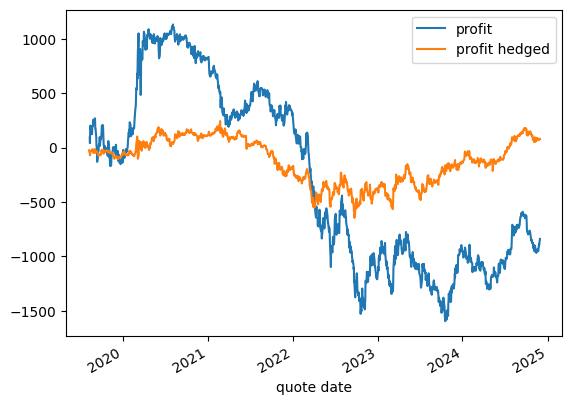

In [154]:
position[['profit','profit hedged']].cumsum().plot()

In [155]:
position[['profit','profit hedged']].describe().drop(index=['count']).style.format('${:,.2f}')

,profit,profit hedged
mean,$-0.63,$0.06
std,$44.59,$21.08
min,$-321.20,$-98.34
25%,$-26.68,$-11.01
50%,$-1.46,$0.00
75%,$24.57,$10.41
max,$276.27,$118.43


### 2.3.

Give two reasons that the daily PnL is not always zero for the hedged position given that we have perfectly hedged the duration.


1) There are other factors that affects the price of the bonds apart from Interest rates such as expectations of inflation, etc. 
2) The modified duration assumption is the usage of the first derivative as aporximationm, but taylor expansion of the dP/P gives other higher order terms. Thus duration is only an apprioximation to the effect of I/r of prices


### 2.4.
The PnL above doesn't account for the coupons.

Calculate a dataframe indexed by dates with columns for the two treasuries with values of coupon payments. 
* Recall that the stated coupon rate is semiannual, so at any give coupon date, it pays half the stated rate.
* Figure out the coupon dates by using the `data` tab and looking for dates where `acc int` goes down. Recall that accrued interest measures the portion of the coupon period that has passed. So when this resets, it is because the coupon has been paid.

Report the first 5 dates that a coupon is paid (by either bond).

### 2.5.
Account for the coupons in the PnL calculations of `2.2`. Report the updated PnL in a plot and a table, similar to the reporting in `2.2`.

In [156]:
long_info_data = treasury_duration_data.loc[IDLONG]
long_coupon = (long_info_data['cpn rate'] * 100/2).values[0] # semi annual rate
long_coupon_dates = long_info_data.loc[long_info_data["accrued int"] == 0]["quote date"]

long_coupon_series = pd.DataFrame([long_coupon] * len(long_coupon_dates), index=long_coupon_dates, columns=['long coupon'])

position = position.merge(long_coupon_series, left_index=True, right_index=True, how='left').fillna(0)

short_info_data = treasury_duration_data.loc[IDSHORT]
short_coupon = (short_info_data['cpn rate'] * 100/2).values[0] # semi annual rate
short_coupon_dates = short_info_data.loc[short_info_data["accrued int"] == 0]["quote date"]

short_coupon_series = pd.DataFrame([short_coupon] * len(short_coupon_dates), index=short_coupon_dates,columns=['short coupon'])
position = position.merge(short_coupon_series, left_index=True, right_index=True, how='left').fillna(0)
print(f"First 5 long coupon dates: {long_coupon_dates.index[:5]}")
print(f"First 5 short coupon dates: {short_coupon_dates.index[:5]}")

# updated pnl 
position["Coupon adjusted Pnl"] = position["profit hedged"] + position["long coupon"] - position["short coupon"]
display(position)

First 5 long coupon dates: Index([207391, 207391, 207391, 207391, 207391], dtype='int64', name='KYTREASNO')
First 5 short coupon dates: Index([207392, 207392, 207392, 207392, 207392], dtype='int64', name='KYTREASNO')


,long,hedge ratio,short,long ($),short ($),net ($),duration,long ($) realized,short ($) realized,long p&l,short p&l,profit hedged,profit,long coupon,short coupon,Coupon adjusted Pnl
quote date,,,,,,,,,,,,,,,,
2019-08-09,101.129810,0.418413,-42.314047,10000.0,-4222.479083,5777.520917,3.552714e-15,10092.438967,-4339.503869,92.438967,-117.024786,-24.585820,0.000000,81.25,112.5,-55.835820
2019-08-12,100.203538,0.408517,-40.934802,10000.0,-4198.055835,5801.944165,0.000000e+00,9948.332550,-4169.913158,-51.667450,28.142676,-23.524773,92.438967,81.25,112.5,-54.774773
2019-08-13,100.723953,0.409555,-41.251958,10000.0,-4202.220951,5797.779049,-3.552714e-15,10113.314448,-4338.868062,113.314448,-136.647111,-23.332664,-51.667450,81.25,112.5,-54.582664
2019-08-14,99.595394,0.398652,-39.703946,10000.0,-4176.048586,5823.951414,0.000000e+00,10047.463430,-4217.923841,47.463430,-41.875255,5.588175,113.314448,81.25,112.5,-25.661825
2019-08-15,99.124913,0.395789,-39.232518,10000.0,-4167.842047,5832.157953,5.329071e-15,9975.993185,-4110.525790,-24.006815,57.316257,33.309442,47.463430,81.25,112.5,2.059442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,112.688456,0.367419,-41.403909,10000.0,-2638.367073,7361.632927,1.776357e-15,10061.626499,-2706.942298,61.626499,-68.575225,-6.948725,-1.320393,0.00,0.0,-6.948725
2024-11-25,111.998250,0.357508,-40.040242,10000.0,-2617.787204,7382.212796,-1.776357e-15,9991.906379,-2609.654032,-8.093621,8.133172,0.039551,61.626499,0.00,0.0,0.039551
2024-11-26,112.088971,0.358454,-40.178741,10000.0,-2618.680845,7381.319155,8.881784e-16,10024.957304,-2637.985475,24.957304,-19.304630,5.652675,-8.093621,0.00,0.0,5.652675


***